This notebook is dedicated to exploratory data analysis on the raw data set.

It covers the following:
*   Loading raw data into a single aggregated dataframe
*   Performing various EDA tasks on the resulting dataframe



In [1]:
# import libraries
from os import path, listdir
import numpy as np
import pandas as pd
import seaborn 
import matplotlib

In [3]:
# display all columns in the dataset when printing (e.g. head())
pd.set_option('display.max_columns', None)

In [2]:
# set full google drive path
# NOTE: check if this points to the correct project fodler on google drive
gdrive_path = "/content/drive/MyDrive/Colab Notebooks/Dissertation"

In [4]:
# This script loads the source datasets and produces a single joint pandas dataframe
def load_sentiment_data():
    data = pd.read_csv(gdrive_path + "/data/Combined_News_DJIA.csv",usecols=['Date','Label'])
    # Set Date as index
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    # Rename column
    data.columns = ['Sentiment']
    return data


def load_spx_data():
    data = pd.read_csv(gdrive_path + "/data/spx.csv")
    # Set Date as index
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    # Rename column
    data.columns = ['SPX_Close']
    return data


# General method for loading Stock/ETF data from many .txt sources in a directory
def load_txts(dir_path):
    # Load the data for multiple .txt files
    data = []
    csv_paths = [dir_path+x for x in listdir(dir_path) if x.endswith('.txt') and path.getsize(dir_path+x) > 0]
    for file_path in csv_paths:
        df = pd.read_csv(file_path, usecols=['Date','Open','High','Low','Close','Volume'])
        # Add 'Ticker' for the Stock/ETF as feature
        df['Ticker'] = file_path.replace(dir_path,'').replace('.txt', '')
        data.append(df)
    data = pd.concat(data, ignore_index=True)
    data.reset_index(inplace=True, drop=True)
    # Set Date as index
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    return data


def load_stock_data():
    return load_txts(gdrive_path + '/data/Stocks/')


def load_etf_data():
    return load_txts(gdrive_path + '/data/ETFs/')


# Filter rows that are no in the time range from a time series dataframe
def filter_by_time(df):
    return df.sort_index().loc['2008-09-01':'2016-07-01']


# Load initial data
sentiment = load_sentiment_data()
spx = load_spx_data()
stocks = load_stock_data()
etfs = load_etf_data()

# Filter sentiment adn spx dataframes by time
sentiment = filter_by_time(sentiment)
spx = filter_by_time(spx)

# Join the datasets into a single dataframe "result"
stock_etf_df = pd.concat([etfs, stocks])
stock_etf_df = filter_by_time(stock_etf_df)
sentiment_labeled_df = stock_etf_df.join(sentiment, how="outer")
result = sentiment_labeled_df.join(spx, how="outer")


In [ ]:
# drop non-numerical values
result = result.replace([np.inf, -np.inf], np.nan).dropna()

In [ ]:
# Basic EDA on the result df
print(result.head()) 

print(result.shape)
print(result.info())

print(result.describe())


              Open    High     Low   Close  Volume   Ticker  Sentiment  \
Date                                                                     
2008-09-02   9.130   9.250   8.990   9.040   82849  cybe.us        0.0   
2008-09-02   7.090   7.690   7.090   7.420  632437    rt.us        0.0   
2008-09-02  27.399  27.399  27.261  27.261    1093   rfv.us        0.0   
2008-09-02  18.500  18.750  17.500  18.500     540  itus.us        0.0   
2008-09-02  10.787  11.323  10.732  11.145  114523   hep.us        0.0   

            SPX_Close  
Date                   
2008-09-02    1277.58  
2008-09-02    1277.58  
2008-09-02    1277.58  
2008-09-02    1277.58  
2008-09-02    1277.58  
(10233577, 8)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10233577 entries, 2008-09-02 to 2016-07-01
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Open       float64
 1   High       float64
 2   Low        float64
 3   Close      float64
 4   Volume     int64  
 5 

               Open      High       Low     Close    Volume  Sentiment  \
Open       1.000000  0.999327  0.998864  0.998352 -0.001436  -0.000290   
High       0.999327  1.000000  0.998589  0.999006 -0.001437  -0.000286   
Low        0.998864  0.998589  1.000000  0.999288 -0.001464  -0.000214   
Close      0.998352  0.999006  0.999288  1.000000 -0.001452  -0.000191   
Volume    -0.001436 -0.001437 -0.001464 -0.001452  1.000000  -0.003993   
Sentiment -0.000290 -0.000286 -0.000214 -0.000191 -0.003993   1.000000   
SPX_Close -0.006416 -0.006464 -0.006444 -0.006452 -0.060214   0.010591   

           SPX_Close  
Open       -0.006416  
High       -0.006464  
Low        -0.006444  
Close      -0.006452  
Volume     -0.060214  
Sentiment   0.010591  
SPX_Close   1.000000  


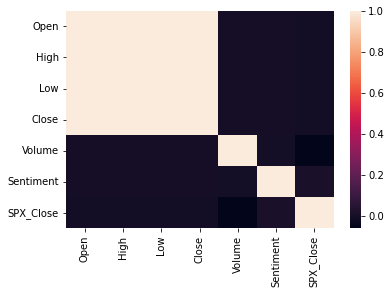

In [ ]:
# This block prints the correlation table and heatmap for result df
print(result.corr())

seaborn.heatmap(result.corr());

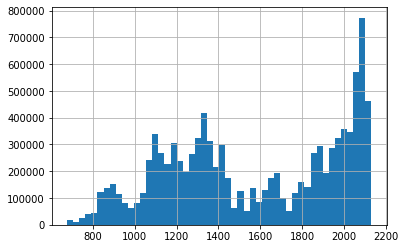

In [ ]:
# Plot the distribution of the SPX_Close variable as a histogram using matplotlib
result.SPX_Close.hist(bins=50)

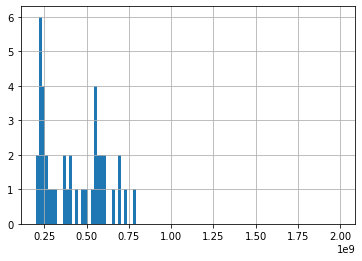

In [ ]:
result.Open.hist(bins=100, range=(200000000,2000000000))